<a href="https://colab.research.google.com/github/albreyes/pronostico/blob/main/vanilla_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vanilla LSTM 

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [ ]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import csv
import numpy as np

In [ ]:
#data_path= 'gdrive/My Drive/Colab Notebooks/resultados-ARENAL-res-p2.csv'
data_path= 'gdrive/My Drive/Colab Notebooks/datosValidadosArenal.csv'
with open(data_path, 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headers = next(reader)
    raw_seq = np.array(list(reader)).astype(float)
    raw_seq = [row[0] for row in raw_seq]

In [ ]:
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
from sklearn.model_selection import train_test_split
num_test = 0.20 # aquí se está especificando 20% para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=num_test)

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
#model.fit(X, y, epochs=200, verbose=0)
model.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


fin


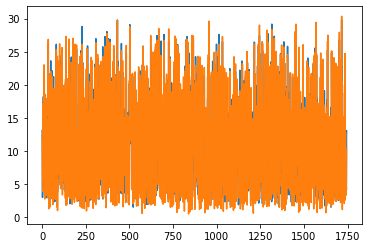

In [ ]:
#l=X.reshape((X.shape[0],X.shape[1]))
l=X_test.reshape((X_test.shape[0],X_test.shape[1]))
lista=array([])
for i in l:
    i = i.reshape((1, n_steps, n_features))
    yhat = model.predict(i, verbose=0)
    lista=np.append(lista,yhat)
print("fin")

import matplotlib.pyplot as plt

plt.plot(lista)
#plt.plot(y)
plt.plot(y_test)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#mape=mean_absolute_percentage_error(lista, y)
mape=mean_absolute_percentage_error(lista, y_test)
print(mape)

18.56525618696237


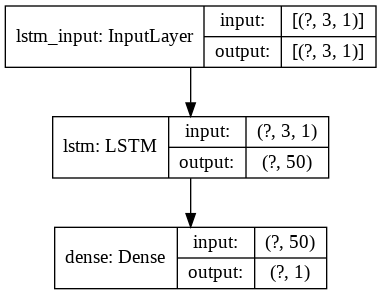

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='gdrive/My Drive/Colab Notebooks/model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Seleccionamos el tipo de clasificador, en este caso RandomForest. 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
# entrenamiento
clf.fit(X_train, y_train)

ValueError: ignored